In [3]:
import pandas as pd 
import numpy as np
from statistics import stdev , mean 
import matplotlib.pyplot as plt

In [4]:
stocks_data = pd.read_excel("updatedstockdata.xlsx")

In [5]:
stocks_data

,beta,marketCap,twoHundredDayAverage,fiftyDayAverage,grossProfits,trailingPE,trailingEps,epsTrailingTwelveMonths,forwardPE,totalCash,...,Net Income_cagr,Net Income_avggrowth,Basic EPS_cagr,Basic EPS_avggrowth,Operating Revenue_cagr,Operating Revenue_avggrowth,Operating Expense_cagr,Operating Expense_avggrowth,Interest Expense_cagr,Interest Expense_avggrowth
0,0.836,7.340467e+09,243.55890,204.2176,4.204985e+09,12.049913,17.23,17.23,NaN,1.657050e+08,...,0.249921,0.351824,0.249930,0.351829,0.125656,0.172842,0.122817,0.173633,-0.137849,-0.176663
1,0.457,7.280700e+08,90.38210,80.2388,4.853500e+08,1.831484,37.86,37.86,NaN,8.639300e+07,...,0.593366,-1.025634,0.593671,-1.024847,0.477959,-1.859751,0.060842,0.082654,-1.000000,-0.258673
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.593366,-1.025634,0.593671,-1.024847,0.477959,-1.859751,0.060842,0.082654,-1.000000,-0.258673
3,0.259,3.160202e+11,33483.10500,28705.4060,1.731431e+10,54.293910,513.96,513.96,46.851750,6.273185e+09,...,0.376778,0.542276,0.376783,0.542283,0.126160,0.175249,0.032511,0.044255,0.045857,0.284837
4,NaN,NaN,44.54025,50.5370,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,-2.994429,1.000000,-2.831801,0.196228,0.286025,0.200396,0.412461,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,0.225,7.825000e+09,207.25716,200.0674,1.601191e+10,3.533053,52.34,52.34,43.004650,4.073400e+09,...,1.000000,0.011148,1.000000,0.011283,0.175835,0.256986,0.177420,0.254447,0.027877,0.044505
1664,0.066,1.038890e+11,1980.85230,1789.9680,1.341500e+10,31.900156,51.18,51.18,22.957346,3.879000e+09,...,0.224467,0.488753,0.210237,0.449196,0.057157,0.077634,0.066439,0.091659,-0.269878,-0.189896
1665,0.791,1.282692e+11,453.92200,428.6670,2.281348e+10,12.771032,34.59,34.59,NaN,1.625407e+10,...,0.221986,0.344137,0.257627,0.393928,0.107130,0.150664,-0.096179,-0.114903,-0.062144,-0.059785
1666,NaN,1.452596e+11,531.86880,689.0150,4.729640e+09,61.755160,13.56,13.56,51.248470,3.644140e+09,...,0.042918,0.072151,0.042919,0.072151,0.094090,0.138822,0.087424,0.120187,-0.570880,-0.589867


In [6]:
columns = ["Retained Earnings_cagr","Free Cash Flow_cagr","Net Income From Continuing Operations_cagr","EBIT_cagr","EBITDA_cagr","grossProfits","operatingMargins","Basic EPS_cagr","tickers"]

In [43]:
#  standardize # standardize 
stocks_data = stocks_data[columns]
stocks_data_new = stocks_data[~stocks_data[columns].isna().any(axis=1)]

In [8]:
stocks_data_new

,Retained Earnings_cagr,Free Cash Flow_cagr,Net Income From Continuing Operations_cagr,EBIT_cagr,EBITDA_cagr,grossProfits,operatingMargins,Basic EPS_cagr,tickers
0,0.166970,-0.045204,0.370808,0.235608,0.185580,4.204985e+09,0.10021,0.249930,20MICRONS
1,-0.605024,0.000000,0.602502,0.555742,0.548775,4.853500e+08,1.26558,0.593671,21STCENMGM
3,0.029772,0.216193,0.372858,0.370346,0.310025,1.731431e+10,0.12851,0.376783,3MINDIA
5,1.000000,1.718578,0.379849,0.265899,0.259122,3.766384e+09,0.26969,0.323063,5PAISA
6,0.016082,1.000000,1.000000,1.000000,1.000000,-4.756120e+08,-5.84348,1.000000,63MOONS
...,...,...,...,...,...,...,...,...,...
1663,-0.227613,-0.308610,1.000000,0.143102,0.100697,1.601191e+10,0.07147,1.000000,ZUARIGLOB
1664,0.167249,-0.049596,0.233892,0.097502,0.086455,1.341500e+10,0.02013,0.210237,ZYDUSWELL
1665,-1.000000,0.427269,0.199759,0.128028,0.105284,2.281348e+10,0.42970,0.257627,NAVA
1666,0.261174,-0.043885,0.044867,0.038525,0.044054,4.729640e+09,0.37461,0.042919,BLUEJET


In [44]:
#  standardisation 
#  x - mean / statdv(x)
def Standardise(column):
    mean_ = np.mean(column)
    stdev_ = np.std(column)
    return (column - mean_) / stdev_

for column in stocks_data_new.columns[:-1]:
    stocks_data_new[column] = Standardise(stocks_data_new[column])
    # stocks_data_new[column].fillna(0.0 , inplace=True)

C:\Users\jhaya\AppData\Local\Temp\ipykernel_16628\732694752.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data_new[column] = Standardise(stocks_data_new[column])


In [45]:
stocks_data_new

,Retained Earnings_cagr,Free Cash Flow_cagr,Net Income From Continuing Operations_cagr,EBIT_cagr,EBITDA_cagr,grossProfits,operatingMargins,Basic EPS_cagr,tickers
0,0.045972,-0.471596,0.198242,0.023394,-0.024034,-0.183299,0.037047,-0.035100,20MICRONS
1,-1.251518,-0.375775,0.686804,0.794502,0.798127,-0.200938,0.058734,0.645806,21STCENMGM
3,-0.184617,0.082494,0.202565,0.347937,0.257672,-0.121131,0.037573,0.216178,3MINDIA
5,1.446042,3.267138,0.217306,0.096355,0.142443,-0.185379,0.040201,0.109766,5PAISA
6,-0.207626,1.743950,1.524985,1.864591,1.819560,-0.205495,-0.073564,1.450689,63MOONS
...,...,...,...,...,...,...,...,...,...
1663,-0.617204,-1.029943,1.524985,-0.199428,-0.216182,-0.127307,0.036512,1.450689,ZUARIGLOB
1664,0.046440,-0.480906,-0.090464,-0.309264,-0.248423,-0.139623,0.035556,-0.113727,ZYDUSWELL
1665,-1.915353,0.529918,-0.162438,-0.235735,-0.205799,-0.095053,0.043178,-0.019854,NAVA
1666,0.204299,-0.468799,-0.489051,-0.451323,-0.344404,-0.180811,0.042153,-0.445163,BLUEJET


In [11]:
#  kmean clustering 
from sklearn.cluster import KMeans

inertias = []
for i in range(2 , 20) :
      kmeans = KMeans(n_clusters=i , random_state=42)
      kmeans.fit(stocks_data_new.iloc[: , :-1])
      inertias.append(kmeans.inertia_)
      


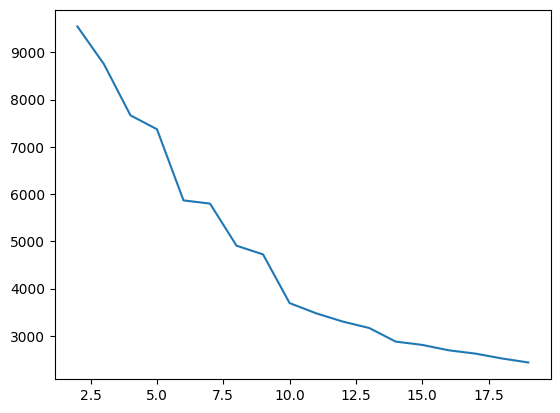

In [12]:
plt.plot(range(2,20) , inertias)

In [15]:
#  finalizing 10 clusters 
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.gridspec as gd 
kmeans = KMeans(n_clusters=13 , random_state=42)
cluster_labels = kmeans.fit(stocks_data_new.iloc[:,0:-1])


In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.gridspec as gd
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

fig = plt.figure(figsize=(120, 75))
gs = gd.GridSpec(13, 1, height_ratios=[1]*13)

for i, k in enumerate(range(2, 15)):
    kmeans = KMeans(n_init=10, n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(stocks_data_new.iloc[:, :-1])
    silhouette_scores = silhouette_samples(stocks_data_new.iloc[:, :-1], cluster_labels)
    avg_score = silhouette_score(stocks_data_new.iloc[:, :-1], cluster_labels)

    ax = plt.subplot(gs[i, 0])
    y_lower, y_upper = 0, 0
    y_ticks = []

    for j, cluster in enumerate(np.unique(cluster_labels)):
        cluster_silhouette_vals = silhouette_scores[cluster_labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)

        ax.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
        y_ticks.append((y_lower + y_upper) / 2)

        y_lower += len(cluster_silhouette_vals)
    ax.axvline(avg_score, color="red", linestyle='--')
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f"Cluster {x}" for x in np.unique(cluster_labels)])
    ax.set_title(f"Silhouette plot for {k} clusters")

    

plt.tight_layout()
plt.show()


In [27]:
kmeans = KMeans(n_clusters= 4 , n_init= 10 , random_state=42)

cluster_labels  = kmeans.fit_predict(stocks_data_new.iloc[: , :-1])
stocks_data_new["cluster"] = cluster_labels

C:\Users\jhaya\AppData\Local\Temp\ipykernel_16628\1436980464.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data_new["cluster"] = cluster_labels


In [ ]:
numeric_columns = stocks_data_new.select_dtypes(include=[np.number]).columns

# Group by 'cluster' and calculate the mean for numeric columns
cluster_means = stocks_data_new.groupby("cluster")[numeric_columns].mean()


         Retained Earnings_cagr  Free Cash Flow_cagr  \
cluster                                                
0                     -0.053377            -0.116630   
1                      2.342800            -0.104155   
2                      0.085869             0.388145   
3                     -0.141967            -0.375656   

         Net Income From Continuing Operations_cagr  EBIT_cagr  EBITDA_cagr  \
cluster                                                                       
0                                         -0.425453  -0.384714    -0.287753   
1                                          0.248334   0.088314     0.496531   
2                                          1.390735   1.262987     0.921219   
3                                         -0.977007  -0.954644     1.818984   

         grossProfits  operatingMargins  Basic EPS_cagr  cluster  
cluster                                                           
0           -0.059695          0.022867       -0.41402

In [33]:
cluster_means

,Retained Earnings_cagr,Free Cash Flow_cagr,Net Income From Continuing Operations_cagr,EBIT_cagr,EBITDA_cagr,grossProfits,operatingMargins,Basic EPS_cagr,cluster
cluster,,,,,,,,,
0,-0.053377,-0.116630,-0.425453,-0.384714,-0.287753,-0.059695,0.022867,-0.414020,0.0
1,2.342800,-0.104155,0.248334,0.088314,0.496531,8.531268,0.039135,0.193599,1.0
2,0.085869,0.388145,1.390735,1.262987,0.921219,-0.130576,0.029492,1.355106,2.0
3,-0.141967,-0.375656,-0.977007,-0.954644,1.818984,-0.203177,-38.729295,-0.914656,3.0


In [37]:
stocks_data_new.to_excel('MomentumClusteredShares.xlsx',index=False)